### 使用预训练模型Inception V3，Xception和Inception Res Net V2分别导出特征文件。

In [1]:
from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *
from sklearn.utils import shuffle
import pandas as pd
from keras.preprocessing.image import *
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

np.random.seed(2018)

def show_loss(Model):
    fig, ax = plt.subplots(2,1)
    his_model = Model.history
    history = his_model.history
    ax[0].plot(history['loss'], color='b', label="loss")
    ax[0].plot(history['val_loss'], color='r', label="val_loss",axes =ax[0])
    legend = ax[0].legend(loc='best', shadow=True)

    ax[1].plot(history['acc'], color='g', label="acc")
    ax[1].plot(history['val_acc'], color='c',label="val_acc")
    legend = ax[1].legend(loc='best', shadow=True)

def show_time():
    print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

def get_model_feature_file(MODEL,image_size,lambda_func=None):
    
    x = Input((image_size[1],image_size[0],3))
    if lambda_func:
        x = Lambda(lambda_func)(x)

    base_model = MODEL(input_tensor=x, weights='imagenet',include_top = False)
    model = Model(base_model.input, GlobalAveragePooling2D()(base_model.output))

    gen2 = ImageDataGenerator()  #图片生成器ImageDataGenerator
    train_generator = gen2.flow_from_directory("train2",image_size,shuffle=False,batch_size=16)
    test_generator = gen2.flow_from_directory("test2", image_size, shuffle=False, batch_size=16,class_mode=None)

    train = model.predict_generator(train_generator,steps = train_generator.samples/16)
    test = model.predict_generator(test_generator,steps = test_generator.samples/16)


    with h5py.File("gap_%s.h5"%MODEL.__name__,mode="w") as h:
        h.create_dataset("train",data=train)
        h.create_dataset("test", data=test)
        h.create_dataset("label", data=train_generator.classes)

show_time()
get_model_feature_file(InceptionV3,(299,299),inception_v3.preprocess_input)
show_time()
get_model_feature_file(Xception,(299,299),xception.preprocess_input)
show_time()
get_model_feature_file(InceptionResNetV2,(299,299),inception_resnet_v2.preprocess_input)
show_time()

/usr/local/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


2018-03-30 14:19:45
Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
2018-03-30 14:23:53
Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
2018-03-30 14:29:51
Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
2018-03-30 14:37:52


### 读取特征文件，将多个模型计算得到的特征向量合并。
### 分别处理将两模型特征合并，三模型特征合并的两种情况。
### fine-tuning分类器，并且预测测试集，将结果提交Kaggle。

2018-03-30 14:51:46


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 146us/step - loss: 0.1002 - acc: 0.9744 - val_loss: 0.0306 - val_acc: 0.9930
Epoch 2/10
20000/20000 [==============================] - 1s 35us/step - loss: 0.0239 - acc: 0.9936 - val_loss: 0.0227 - val_acc: 0.9934
Epoch 3/10
20000/20000 [==============================] - 1s 34us/step - loss: 0.0178 - acc: 0.9942 - val_loss: 0.0203 - val_acc: 0.9936
Epoch 4/10
20000/20000 [==============================] - 1s 37us/step - loss: 0.0163 - acc: 0.9949 - val_loss: 0.0198 - val_acc: 0.9940
Epoch 5/10
20000/20000 [==============================] - 1s 37us/step - loss: 0.0147 - acc: 0.9951 - val_loss: 0.0197 - val_acc: 0.9938
Epoch 6/10
20000/20000 [==============================] - 1s 35us/step - loss: 0.0149 - acc: 0.9950 - val_loss: 0.0199 - val_acc: 0.9936
Epoch 7/10
20000/20000 [==============================] - 1s 36us/step - loss: 0.0137 - acc: 0.9952 - val_loss: 0.0194 - val_acc

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


2018-03-30 14:51:58
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 149us/step - loss: 0.0649 - acc: 0.9842 - val_loss: 0.0262 - val_acc: 0.9912
Epoch 2/10
20000/20000 [==============================] - 1s 38us/step - loss: 0.0182 - acc: 0.9950 - val_loss: 0.0187 - val_acc: 0.9938
Epoch 3/10
20000/20000 [==============================] - 1s 40us/step - loss: 0.0140 - acc: 0.9956 - val_loss: 0.0185 - val_acc: 0.9940
Epoch 4/10
20000/20000 [==============================] - 1s 39us/step - loss: 0.0131 - acc: 0.9961 - val_loss: 0.0172 - val_acc: 0.9946
Epoch 5/10
20000/20000 [==============================] - 1s 38us/step - loss: 0.0125 - acc: 0.9961 - val_loss: 0.0166 - val_acc: 0.9942
Epoch 6/10
20000/20000 [==============================] - 1s 38us/step - loss: 0.0117 - acc: 0.9965 - val_loss: 0.0167 - val_acc: 0.9942
Epoch 7/10
20000/20000 [==============================] - 1s 38us/step - loss: 0.0104 - acc: 0.9969 - val_lo

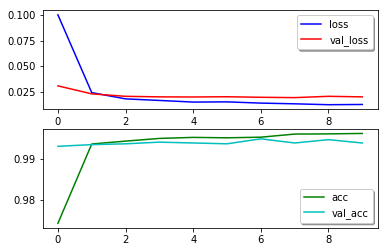

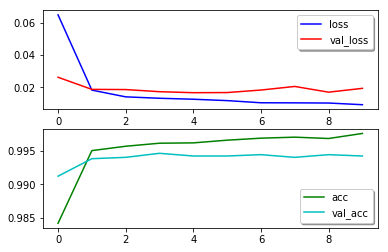

In [3]:
IV3_X_files = ["gap_Xception.h5", "gap_InceptionV3.h5"]
IV3_X_IRV2_files = ["gap_Xception.h5", "gap_InceptionV3.h5","gap_InceptionResNetV2.h5"]

def fine_tuning_net(files_list):
    
    X_train = []
    X_test = []

    for filename in files_list:
        with h5py.File(filename, 'r') as h:
            X_train.append(np.array(h['train']))
            X_test.append(np.array(h['test']))
            y_train = np.array(h['label'])

    X_train = np.concatenate(X_train, axis=1)
    X_test = np.concatenate(X_test, axis=1)
    X_train, y_train = shuffle(X_train, y_train)

    input_tensor = Input(X_train.shape[1:])
    x = Dropout(0.5)(input_tensor)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(input_tensor, x)

    model.compile(optimizer='adadelta',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, batch_size=128, nb_epoch=10, validation_split=0.2)

    show_loss(model)
    y_pred = model.predict(X_test, verbose=1)
    y_pred = y_pred.clip(min=0.005, max=0.995)
    return y_pred

def result_csv(y_pred,csvfilename):
    df = pd.read_csv("sample_submission.csv")
    gen = ImageDataGenerator()
    test_generator = gen.flow_from_directory("test2", (224, 224), shuffle=False,
                                             batch_size=16, class_mode=None)
 
    for i, fname in enumerate(test_generator.filenames):
        index = int(fname[fname.rfind('/')+1:fname.rfind('.')])
        df.set_value(index-1, 'label', y_pred[i])

    df.to_csv(csvfilename, index=None)

show_time()
result_csv(fine_tuning_net(IV3_X_files),"IV3_X_"+"pred.csv")
show_time()
result_csv(fine_tuning_net(IV3_X_IRV2_files),"IV3_X_IRV2_"+"pred.csv")
show_time()